Loaded 5Rnk-1P3Pqp-1K1Np3-pP1bN1r1-Pp1rP1P1-p1P3B1-1P1p1pQp-n1R3bB w - - 0 1.png (880px x 880px)


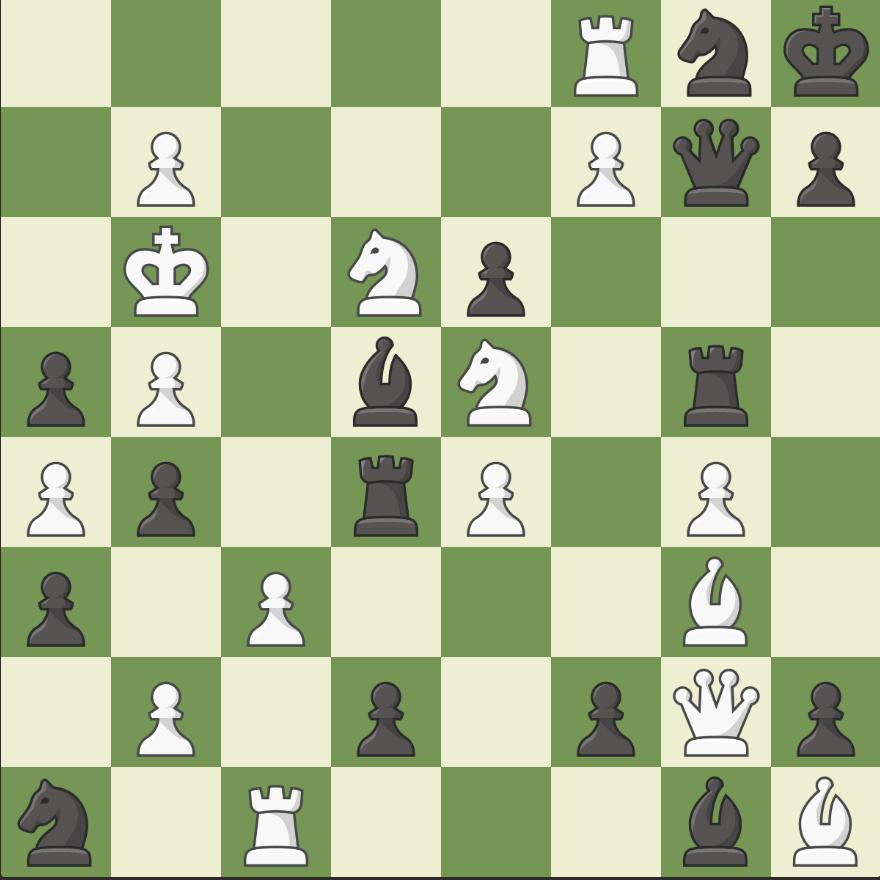

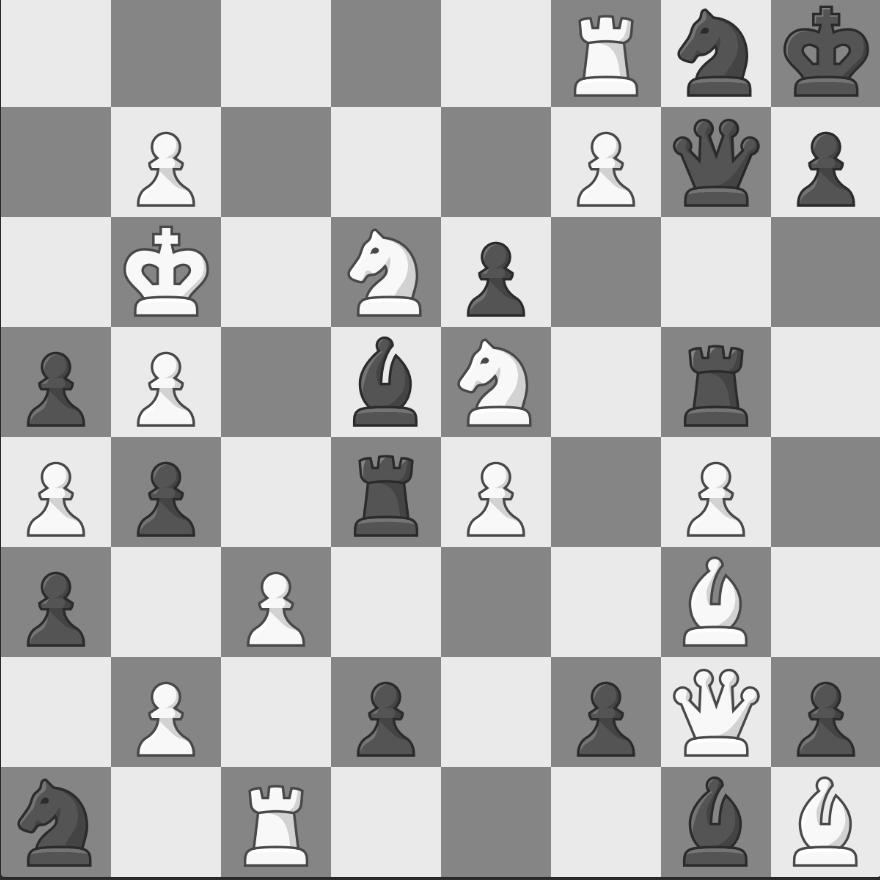

Instructions for updating:
Use `tf.global_variables_initializer` instead.


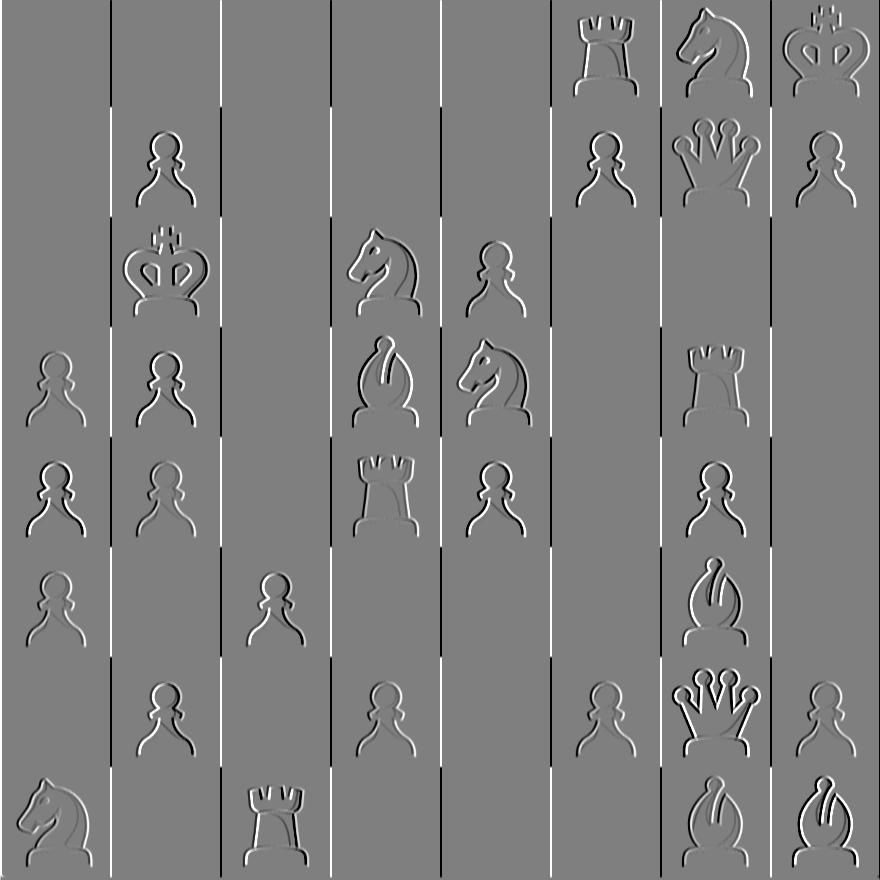

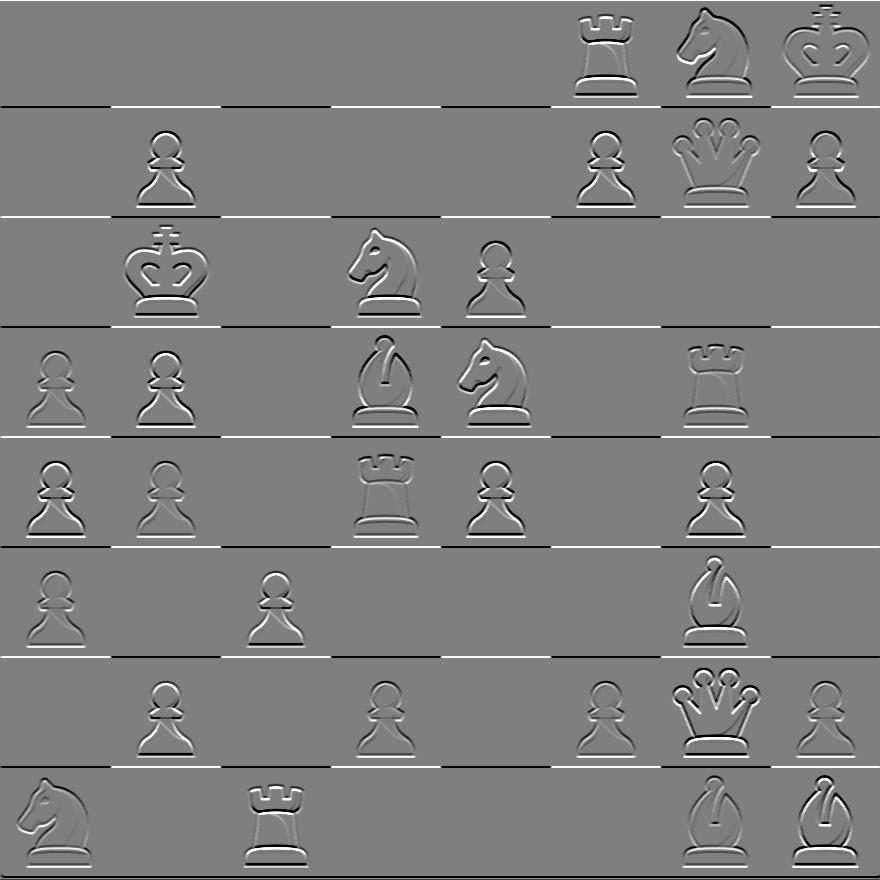

0 110
0 110
0 110
0 110
X [111 221 331 441 551 661 771] [110 110 110 110 110 110]
Y [107 217 327 437 547 657 767] [110 110 110 110 110 110]
Chessboard found
X   (vertical) [111 221 331 441 551 661 771] [110 110 110 110 110 110]
Y (horizontal) [107 217 327 437 547 657 767] [110 110 110 110 110 110]
7 horizontal and vertical lines found, slicing up squares
Tiles generated: (110x110)*64
Order is row-wise from top left of image going right and down, so a8,b8....a7,b7,c7...h1
Showing 5 random squares...
#8: A2


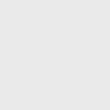

#55: H7


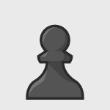

#5: F1


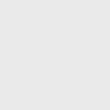

#9: B2


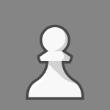

#10: C2


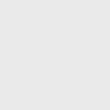

Created dir chessboards/output_tiles/squares_5Rnk-1P3Pqp-1K1Np3-pP1bN1r1-Pp1rP1P1-p1P3B1-1P1p1pQp-n1R3bB w - - 0 1
#0: saving chessboards/output_tiles/squares_5Rnk-1P3Pqp-1K1Np3-pP1bN1r1-Pp1rP1P1-p1P3B1-1P1p1pQp-n1R3bB w - - 0 1/5Rnk-1P3Pqp-1K1Np3-pP1bN1r1-Pp1rP1P1-p1P3B1-1P1p1pQp-n1R3bB w - - 0 1_A1.png...
#8: saving chessboards/output_tiles/squares_5Rnk-1P3Pqp-1K1Np3-pP1bN1r1-Pp1rP1P1-p1P3B1-1P1p1pQp-n1R3bB w - - 0 1/5Rnk-1P3Pqp-1K1Np3-pP1bN1r1-Pp1rP1P1-p1P3B1-1P1p1pQp-n1R3bB w - - 0 1_A2.png...
#16: saving chessboards/output_tiles/squares_5Rnk-1P3Pqp-1K1Np3-pP1bN1r1-Pp1rP1P1-p1P3B1-1P1p1pQp-n1R3bB w - - 0 1/5Rnk-1P3Pqp-1K1Np3-pP1bN1r1-Pp1rP1P1-p1P3B1-1P1p1pQp-n1R3bB w - - 0 1_A3.png...
#24: saving chessboards/output_tiles/squares_5Rnk-1P3Pqp-1K1Np3-pP1bN1r1-Pp1rP1P1-p1P3B1-1P1p1pQp-n1R3bB w - - 0 1/5Rnk-1P3Pqp-1K1Np3-pP1bN1r1-Pp1rP1P1-p1P3B1-1P1p1pQp-n1R3bB w - - 0 1_A4.png...
#32: saving chessboards/output_tiles/squares_5Rnk-1P3Pqp-1K1Np3-pP1bN1r1-Pp1rP1P1-p1P3B1-1P1p1pQp-n1R3bB w 

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
import numpy as np
np.set_printoptions(suppress=True)

sess = tf.InteractiveSession()

# Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import clear_output, Image, display
import scipy.ndimage as nd
import scipy.signal


def display_array(a, format='jpeg', rng=[0, 1]):
    a = (a - rng[0]) / float(rng[1] - rng[0]) * 255
    a = np.uint8(np.clip(a, 0, 255))
    file = BytesIO()
    PIL.Image.fromarray(a).save(file, format)
    display(Image(data=file.getvalue()))

# File
# img_file = 'img1.png'
# img_file = 'img2.png'
# img_file = 'img3.gif'
# img_file = 'img4.jpg'
# img_file = 'img7.png'
# img_file = 'img9.png' # Doesn't work anymore due to non-alternating checkerboard lines


# Bad fit example
# img_file = 't1.png'
img_file = '5Rnk-1P3Pqp-1K1Np3-pP1bN1r1-Pp1rP1P1-p1P3B1-1P1p1pQp-n1R3bB w - - 0 1.png'

# img_file = 'lichess_5.png'

# folder = "chessboards/input_chessboards"
# folder = "chessboards/test_chessboards"
folder = "training_chessboards"

img = PIL.Image.open("%s/%s" % (folder, img_file))

print ("Loaded %s (%dpx x %dpx)" % \
    (img_file, img.size[0], img.size[1]))

# Resize if image larger than 2k pixels on a side
if img.size[0] > 2000 or img.size[1] > 2000:
    print ("Image too big (%d x %d)" % (img.size[0], img.size[1]))
    new_size = 500.0  # px
    if img.size[0] > img.size[1]:
        # resize by width to new limit
        ratio = new_size / img.size[0]
    else:
        # resize by height
        ratio = new_size / img.size[1]
    print ("Reducing by factor of %.2g" % (1. / ratio))
    img = img.resize(img.size * ratio, PIL.Image.ADAPTIVE)
    print ("New size: (%d x %d)" % (img.size[0], img.size[1]))

# See original image
display_array(np.asarray(img), rng=[0, 255])

# Convert to grayscale and array
a = np.asarray(img.convert("L"), dtype=np.float32)

# Display array
display_array(a, rng=[0, 255])


def make_kernel(a):
    """Transform a 2D array into a convolution kernel"""
    a = np.asarray(a)
    a = a.reshape(list(a.shape) + [1, 1])
    return tf.constant(a, dtype=1)


def simple_conv(x, k):
    """A simplified 2D convolution operation"""
    x = tf.expand_dims(tf.expand_dims(x, 0), -1)
    y = tf.nn.depthwise_conv2d(x, k, [1, 1, 1, 1], padding='SAME')
    return y[0, :, :, 0]


def gradientx(x):
    """Compute the x gradient of an array"""
    gradient_x = make_kernel([[-1., 0., 1.],
                              [-1., 0., 1.],
                              [-1., 0., 1.]])
    return simple_conv(x, gradient_x)


def gradienty(x):
    """Compute the x gradient of an array"""
    gradient_y = make_kernel([[-1., -1, -1], [0., 0, 0], [1., 1, 1]])
    return simple_conv(x, gradient_y)


def corners(x):
    """Find chess square corners in an array"""
    chess_corner = make_kernel([[-1., 0, 1], [0., 0., 0.], [1., 0, -1]])
    return simple_conv(x, chess_corner)

# Following are meant for binary images


def dilate(x, size=3):
    """Dilate"""
    kernel = make_kernel(np.ones([size, size], dtype=np.float32))
    return tf.clip_by_value(simple_conv(x, kernel),
                            np.float32(1),
                            np.float32(2)) - np.float32(1)


def erode(x, size=3):
    """Erode"""
    kernel = make_kernel(np.ones([size, size]))
    return tf.clip_by_value(simple_conv(x, kernel),
                            np.float32(size * size - 1),
                            np.float32(size * size)) - np.float32(size * size - 1)


def opening(x, size=3):
    return dilate(erode(x, size), size)


def closing(x, size=3):
    return erode(dilate(x, size), size)


def skeleton(x, size=3):
    """Skeletonize"""
    return tf.clip_by_value(erode(x) - opening(erode(x)),
                            0.,
                            1.)


# Get our grayscale image matrix
A = tf.Variable(a)

# Get X & Y gradients and subtract opposite gradient
# Strongest response where gradient is unidirectional
# clamp into range 0-1
# Dx = tf.clip_by_value(np.abs(gradientx(A)) - np.abs(gradienty(A)),
#                       0., 1.)
# Dy = tf.clip_by_value(np.abs(gradienty(A)) - np.abs(gradientx(A)),
#                       0., 1.)

Dx = gradientx(A)
Dy = gradienty(A)

# Dxy = np.abs(gradientx(A) * gradienty(A))
# Dc = np.abs(corners(A))

# Initialize state to initial conditions
tf.initialize_all_variables().run()

display_array(Dx.eval(), rng=[-255, 255])
display_array(Dy.eval(), rng=[-255, 255])

Dx_pos = tf.clip_by_value(Dx, 0., 255., name="dx_positive")
Dx_neg = tf.clip_by_value(Dx, -255., 0., name='dx_negative')
Dy_pos = tf.clip_by_value(Dy, 0., 255., name="dy_positive")
Dy_neg = tf.clip_by_value(Dy, -255., 0., name='dy_negative')


hough_Dx = tf.reduce_sum(Dx_pos, 0) * \
    tf.reduce_sum(-Dx_neg, 0) / (a.shape[0] * a.shape[0])
hough_Dy = tf.reduce_sum(Dy_pos, 1) * \
    tf.reduce_sum(-Dy_neg, 1) / (a.shape[1] * a.shape[1])
# Normalized to 0-255*255=65025 range

#%matplotlib inline
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

# Arbitrarily choose half of max value as threshold, since they're such strong responses
hough_Dx_thresh = tf.reduce_max(hough_Dx) * 3 / 5
hough_Dy_thresh = tf.reduce_max(hough_Dy) * 3 / 5

ax1.plot(hough_Dx.eval())
ax1.axhline(hough_Dx_thresh.eval(), lw=2, linestyle=':', color='r')
ax1.set_title('Hough Gradient X')
ax1.set_xlabel('Pixel')
ax1.set_xlim(0, a.shape[1])

ax2.plot(hough_Dy.eval())
ax2.axhline(hough_Dy_thresh.eval(), lw=2, linestyle=':', color='r')
ax2.set_title('Hough Gradient Y')
ax2.set_xlim(0, a.shape[0])
ax2.set_xlabel('Pixel')


def checkMatch(lineset):
    """Checks whether there exists 7 lines of consistent increasing order in set of lines"""
    linediff = np.diff(lineset)
    x = 0
    cnt = 0
    for line in linediff:
        # Within 5 px of the other (allowing for minor image errors)
        if np.abs(line - x) < 5:
            cnt += 1
        else:
            cnt = 0
            x = line
    return cnt == 5


def pruneLines(lineset):
    """Prunes a set of lines to 7 in consistent increasing order (chessboard)"""
    linediff = np.diff(lineset)
    x = 0
    cnt = 0
    start_pos = 0
    for i, line in enumerate(linediff):
        # Within 5 px of the other (allowing for minor image errors)
        if np.abs(line - x) < 5:
            cnt += 1
            if cnt == 5:
                end_pos = i + 2
                return lineset[start_pos:end_pos]
        else:
            cnt = 0
            x = line
            print (i, x)
            start_pos = i
    return lineset


def skeletonize_1d(arr):
    """return skeletonized 1d array (thin to single value, favor to the right)"""
    _arr = arr.copy()  # create a copy of array to modify without destroying original
    # Go forwards
    for i in range(_arr.size - 1):
        # Will right-shift if they are the same
        if arr[i] <= _arr[i + 1]:
            _arr[i] = 0

    # Go reverse
    for i in np.arange(_arr.size - 1, 0, -1):
        if _arr[i - 1] > _arr[i]:
            _arr[i] = 0
    return _arr


def getChessLines(hdx, hdy, hdx_thresh, hdy_thresh):
    """Returns pixel indices for the 7 internal chess lines in x and y axes"""
    # Blur
    gausswin = scipy.signal.gaussian(21, 4)
    gausswin /= np.sum(gausswin)

    # Blur where there is a strong horizontal or vertical line (binarize)
    blur_x = np.convolve(hdx > hdx_thresh, gausswin, mode='same')
    blur_y = np.convolve(hdy > hdy_thresh, gausswin, mode='same')

    skel_x = skeletonize_1d(blur_x)
    skel_y = skeletonize_1d(blur_y)

    # Find points on skeletonized arrays (where returns 1-length tuple)
    lines_x = np.where(skel_x)[0]  # vertical lines
    lines_y = np.where(skel_y)[0]  # horizontal lines

    # Prune inconsistent lines
    lines_x = pruneLines(lines_x)
    lines_y = pruneLines(lines_y)

    is_match = len(lines_x) == 7 and len(
        lines_y) == 7 and checkMatch(lines_x) and checkMatch(lines_y)

    return lines_x, lines_y, is_match


# Get chess lines
lines_x, lines_y, is_match = getChessLines(hough_Dx.eval().flatten(),
                                           hough_Dy.eval().flatten(),
                                           hough_Dx_thresh.eval(),
                                           hough_Dy_thresh.eval())

lines_x, lines_y, is_match = getChessLines(hough_Dx.eval().flatten(),
                                           hough_Dy.eval().flatten(),
                                           hough_Dx_thresh.eval() * .9,
                                           hough_Dy_thresh.eval() * .9)

print ("X", lines_x, np.diff(lines_x))
print ("Y", lines_y, np.diff(lines_y))
if is_match:
    print ("Chessboard found")
else:
    print ("Couldn't find Chessboard")

# Plot blurred 1d hough arrays and skeletonized versions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax1.plot(hough_Dx.eval())
ax1.axhline(hough_Dx_thresh.eval(), lw=2, linestyle=':', color='r')
ax1.set_title('Hough Gradient X')
ax1.set_xlabel('Pixel')
ax1.set_xlim(0, a.shape[1])

ax2.plot(hough_Dy.eval())
ax2.axhline(hough_Dy_thresh.eval(), lw=2, linestyle=':', color='r')
ax2.set_title('Hough Gradient Y')
ax2.set_xlim(0, a.shape[0])
ax2.set_xlabel('Pixel')

# Plot lines for where peaks where found
if len(lines_x < 20):
    for hx in lines_x:
        ax1.axvline(hx, color='r')
if len(lines_y < 20):
    for hy in lines_y:
        ax2.axvline(hy, color='r')

plt.imshow(img)
for hx in lines_x:
    plt.axvline(hx, color='b', lw=2)

for hy in lines_y:
    plt.axhline(hy, color='r', lw=2)


print ("X   (vertical)", lines_x, np.diff(lines_x))
print ("Y (horizontal)", lines_y, np.diff(lines_y))


def getChessTiles(a, lines_x, lines_y):
    """Split up input grayscale array into 64 tiles stacked in a 3D matrix using the chess linesets"""
    # Find average square size, round to a whole pixel for determining edge pieces sizes
    stepx = np.int32(np.round(np.mean(np.diff(lines_x))))
    stepy = np.int32(np.round(np.mean(np.diff(lines_y))))

    # Pad edges as needed to fill out chessboard (for images that are partially over-cropped)
#     print stepx, stepy
#     print "x",lines_x[0] - stepx, "->", lines_x[-1] + stepx, a.shape[1]
#     print "y", lines_y[0] - stepy, "->", lines_y[-1] + stepy, a.shape[0]
    padr_x = 0
    padl_x = 0
    padr_y = 0
    padl_y = 0

    if lines_x[0] - stepx < 0:
        padl_x = np.abs(lines_x[0] - stepx)
    if lines_x[-1] + stepx > a.shape[1] - 1:
        padr_x = np.abs(lines_x[-1] + stepx - a.shape[1])
    if lines_y[0] - stepy < 0:
        padl_y = np.abs(lines_y[0] - stepy)
    if lines_y[-1] + stepx > a.shape[0] - 1:
        padr_y = np.abs(lines_y[-1] + stepy - a.shape[0])

    # New padded array
#     print "Padded image to", ((padl_y,padr_y),(padl_x,padr_x))
    a2 = np.pad(a, ((padl_y, padr_y), (padl_x, padr_x)), mode='edge')

    setsx = np.hstack([lines_x[0] - stepx, lines_x,
                       lines_x[-1] + stepx]) + padl_x
    setsy = np.hstack([lines_y[0] - stepy, lines_y,
                       lines_y[-1] + stepy]) + padl_y

    a2 = a2[setsy[0]:setsy[-1], setsx[0]:setsx[-1]]
    setsx -= setsx[0]
    setsy -= setsy[0]
#     display_array(a2, rng=[0,255])
#     print "X:",setsx
#     print "Y:",setsy

    # Matrix to hold images of individual squares (in grayscale)
#     print "Square size: [%g, %g]" % (stepy, stepx)
    squares = np.zeros([np.round(stepy), np.round(stepx), 64], dtype=np.uint8)

    # For each row
    for i in range(0, 8):
        # For each column
        for j in range(0, 8):
            # Vertical lines
            x1 = setsx[i]
            x2 = setsx[i + 1]
            padr_x = 0
            padl_x = 0
            padr_y = 0
            padl_y = 0

            if (x2 - x1) > stepx:
                if i == 7:
                    x1 = x2 - stepx
                else:
                    x2 = x1 + stepx
            elif (x2 - x1) < stepx:
                if i == 7:
                    # right side, pad right
                    padr_x = stepx - (x2 - x1)
                else:
                    # left side, pad left
                    padl_x = stepx - (x2 - x1)
            # Horizontal lines
            y1 = setsy[j]
            y2 = setsy[j + 1]

            if (y2 - y1) > stepy:
                if j == 7:
                    y1 = y2 - stepy
                else:
                    y2 = y1 + stepy
            elif (y2 - y1) < stepy:
                if j == 7:
                    # right side, pad right
                    padr_y = stepy - (y2 - y1)
                else:
                    # left side, pad left
                    padl_y = stepy - (y2 - y1)
            # slicing a, rows sliced with horizontal lines, cols by vertical lines so reversed
            # Also, change order so its A1,B1...H8 for a white-aligned board
            # Apply padding as defined previously to fit minor pixel offsets
            squares[:, :, (7 - j) * 8 + i] = np.pad(a2[y1:y2, x1:x2],
                                                    ((padl_y, padr_y), (padl_x, padr_x)), mode='edge')
    return squares


if is_match:
    # Possibly check np.std(np.diff(lines_x)) for variance etc. as well/instead
    print ("7 horizontal and vertical lines found, slicing up squares")
    squares = getChessTiles(a, lines_x, lines_y)
    print ("Tiles generated: (%dx%d)*%d" % (squares.shape[0], squares.shape[1], squares.shape[2]))
else:
    print ("Number of lines not equal to 7")

letters = 'ABCDEFGH'

if is_match:
    print ("Order is row-wise from top left of image going right and down, so a8,b8....a7,b7,c7...h1")
    print ("Showing 5 random squares...")
    for i in np.random.choice(np.arange(64), 5, replace=False):
        print ("#%d: %s%d" % (i, letters[i % 8], i / 8 + 1))
        display_array(squares[:, :, i], rng=[0, 255])
else:
    print ("Didn't have lines to slice image up.")

img_save_dir = "chessboards/output_tiles/squares_%s" % img_file[:-4]

if not is_match:
    print ("No squares to save")
else:
    if not os.path.exists(img_save_dir):
        os.makedirs(img_save_dir)
        print ("Created dir %s" % img_save_dir)

    for i in range(64):
        sqr_filename = "%s/%s_%s%d.png" % (img_save_dir,
                                           img_file[:-4], letters[i % 8], i / 8 + 1)
        if i % 8 == 0:
            print ("#%d: saving %s..." % (i, sqr_filename))

        # Make resized 32x32 image from matrix and save
        PIL.Image.fromarray(squares[:, :, i]) \
            .resize([32, 32], PIL.Image.ADAPTIVE) \
            .save(sqr_filename)
